## **Importing libraries and modules**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd
from glob import glob
from PIL import Image
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import os, sys, math, cv2, random
from sklearn.model_selection import train_test_split
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

for dirname, _, filenames in os.walk('../input/lgg-mri-segmentation/'):
    for filename in filenames:
        (os.path.join(dirname, filename))

sns.set_style('dark')
        
print("Done !!! \n\nmodules and libraries imported !!")
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Done !!! 

modules and libraries imported !!


## **Observing Data and making train dataFrame**

In [2]:
data = pd.read_csv('../input/lgg-mri-segmentation/kaggle_3m/data.csv')
data

,Patient,RNASeqCluster,MethylationCluster,miRNACluster,CNCluster,RPPACluster,OncosignCluster,COCCluster,histological_type,neoplasm_histologic_grade,tumor_tissue_site,laterality,tumor_location,gender,age_at_initial_pathologic,race,ethnicity,death01
0,TCGA_CS_4941,2.0,4.0,2,2.0,NaN,3.0,2,1.0,2.0,1.0,3.0,2.0,2.0,67.0,3.0,2.0,1.0
1,TCGA_CS_4942,1.0,5.0,2,1.0,1.0,2.0,1,1.0,2.0,1.0,3.0,2.0,1.0,44.0,2.0,NaN,1.0
2,TCGA_CS_4943,1.0,5.0,2,1.0,2.0,2.0,1,1.0,2.0,1.0,1.0,2.0,2.0,37.0,3.0,NaN,0.0
3,TCGA_CS_4944,NaN,5.0,2,1.0,2.0,1.0,1,1.0,1.0,1.0,3.0,6.0,2.0,50.0,3.0,NaN,0.0
4,TCGA_CS_5393,4.0,5.0,2,1.0,2.0,3.0,1,1.0,2.0,1.0,1.0,6.0,2.0,39.0,3.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,TCGA_HT_8563,2.0,5.0,3,1.0,NaN,2.0,2,1.0,2.0,1.0,3.0,2.0,1.0,30.0,3.0,2.0,0.0
106,TCGA_HT_A5RC,2.0,4.0,2,2.0,NaN,3.0,2,1.0,2.0,1.0,1.0,2.0,1.0,70.0,3.0,2.0,1.0
107,TCGA_HT_A616,NaN,5.0,2,1.0,NaN,2.0,1,1.0,1.0,1.0,1.0,2.0,1.0,36.0,3.0,2.0,0.0
108,TCGA_HT_A61A,NaN,5.0,2,NaN,NaN,NaN,1,3.0,1.0,1.0,1.0,6.0,1.0,20.0,3.0,2.0,0.0


In [3]:
train_data_paths = []
mask_data_paths = glob('../input/lgg-mri-segmentation/kaggle_3m/*/*_mask*')

for i in tqdm(mask_data_paths):
    train_data_paths.append(i.replace('_mask',''))

print(train_data_paths[:5], end='\n\n')
print(mask_data_paths[:5], end='\n\n')
print(len(train_data_paths))
print(len(mask_data_paths))

  0%|          | 0/3929 [00:00<?, ?it/s]

['../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_56.tif', '../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_8.tif', '../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_34.tif', '../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_33.tif', '../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_43.tif']

['../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_56_mask.tif', '../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_8_mask.tif', '../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_34_mask.tif', '../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_33_mask.tif', '../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_43_mask.tif']

3929
3929


In [4]:
mask_data_paths[0]

'../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_56_mask.tif'

In [5]:
'../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_9_mask.tif' in mask_data_paths

True

In [6]:
tumor_status = []
for msk_path in tqdm(mask_data_paths):
    msk=cv2.imread(msk_path)
    msk=cv2.cvtColor(msk,cv2.COLOR_BGR2GRAY)
    tumor_status.append(not (np.array(msk).sum() == 0))

  0%|          | 0/3929 [00:00<?, ?it/s]

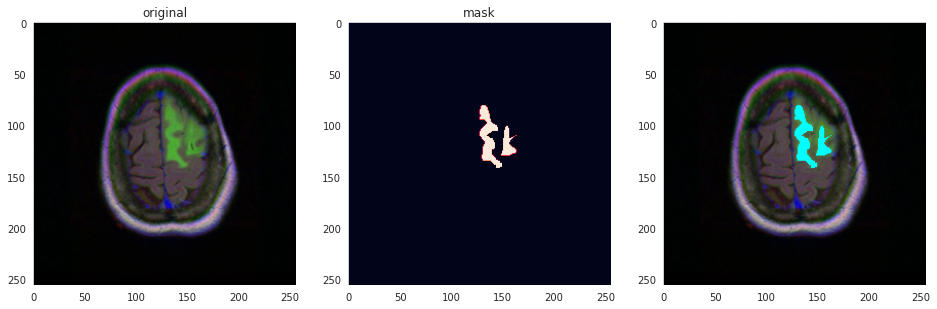

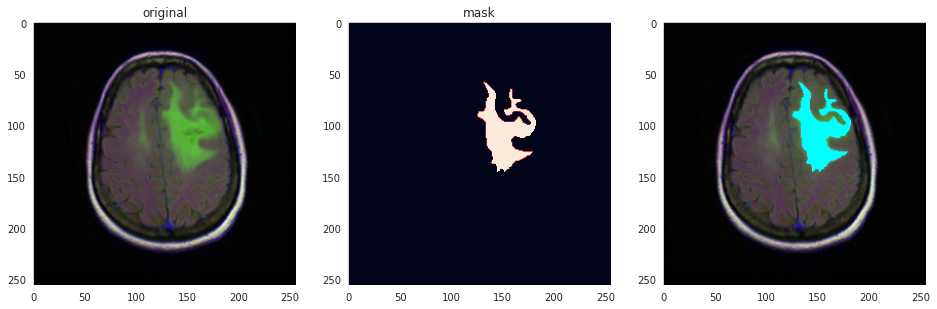

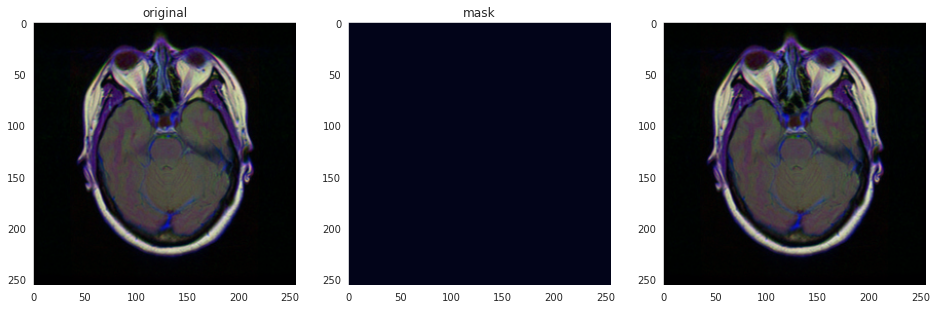

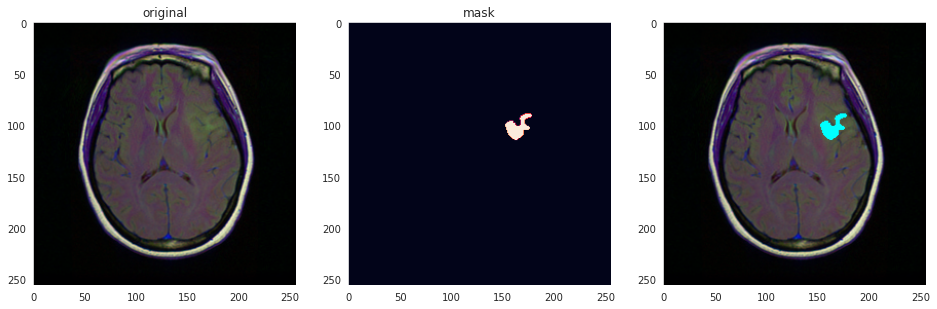

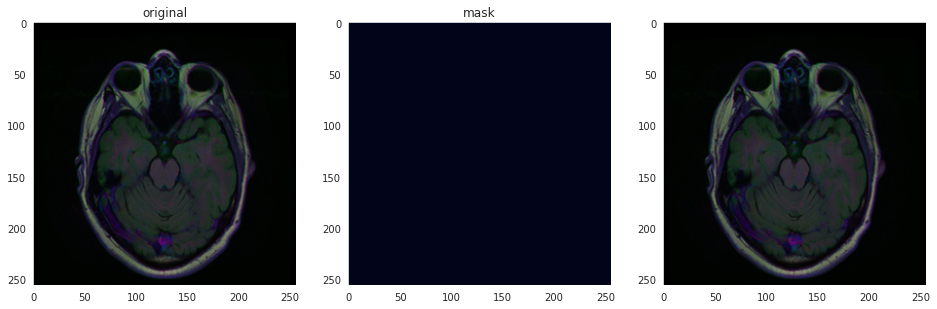

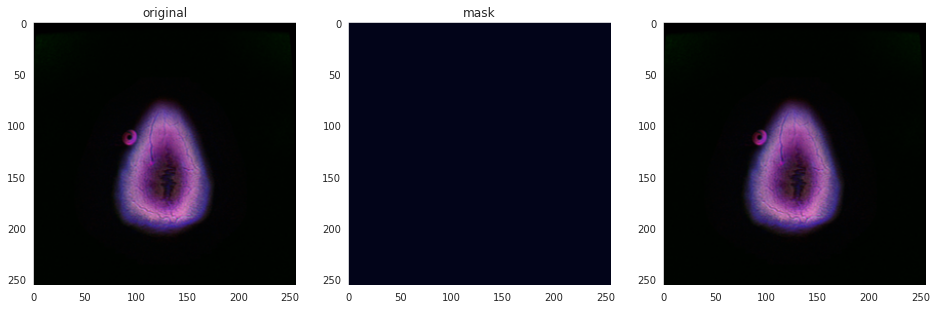

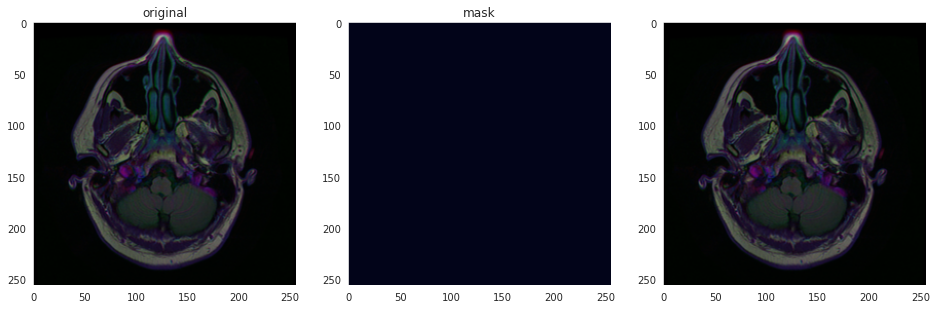

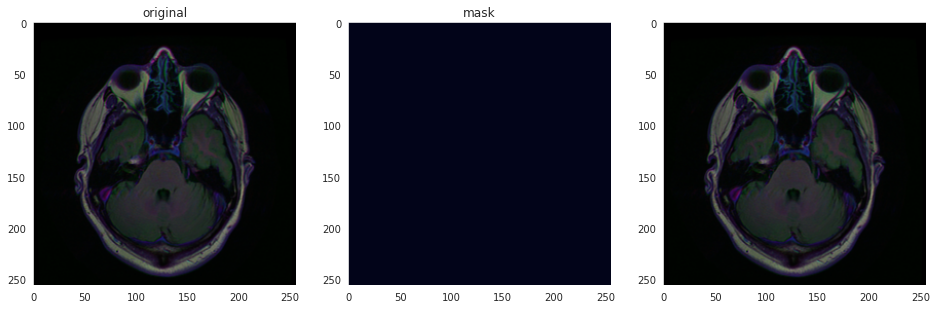

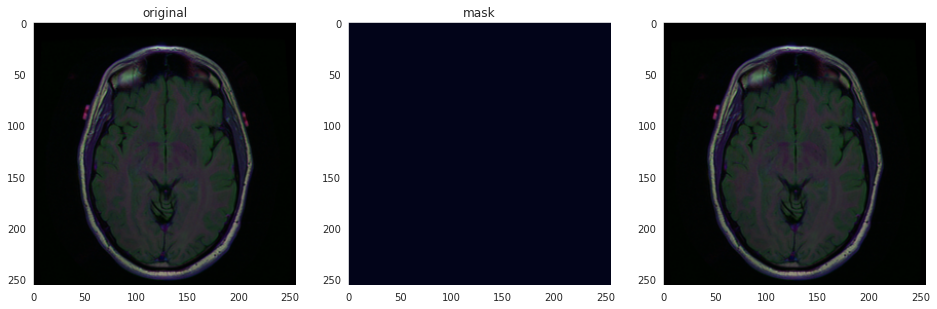

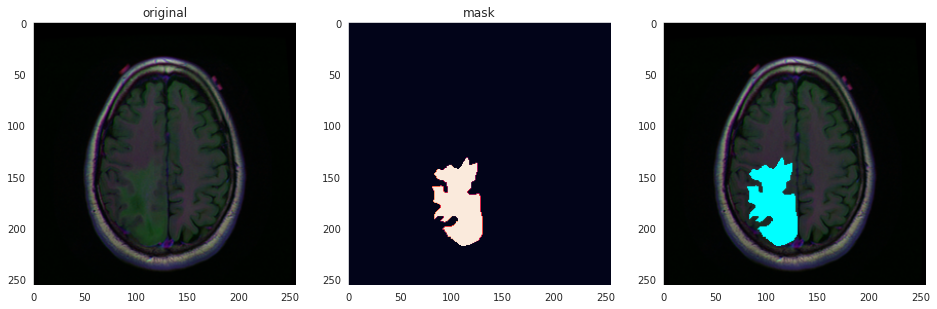

In [7]:
def show_n_images_from_train_data(n = 10):
    start = np.random.randint(0, len(mask_data_paths) - n + 1)
    for i in range(start, start + n):
        img_path = train_data_paths[i]
        msk_path = mask_data_paths[i]
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        msk = cv2.imread(msk_path)
        msk = cv2.cvtColor(msk,cv2.COLOR_BGR2GRAY)

        plt.figure(figsize=(16,16))
        plt.subplot(1,3,1)
        plt.title('original')
        plt.imshow(img)

        plt.subplot(1,3,2)
        plt.title('mask')
        plt.imshow(msk)

        img[msk==255]=(0,255,255)
        plt.subplot(1,3,3)
        plt.title('original with mask', color='w')
        plt.imshow(img)
        plt.show()
        
show_n_images_from_train_data(10)

In [8]:
train_df = pd.DataFrame(data = {'image' : train_data_paths,
                                'mask' : mask_data_paths,
                                'tumor_status' : tumor_status})
train_df

,image,mask,tumor_status
0,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,False
1,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,False
2,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,True
3,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,True
4,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,True
...,...,...,...
3924,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,False
3925,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,False
3926,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,False
3927,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,False


Text(0.5, 1.0, 'Tumor status plot showing count of number of tumor patients')

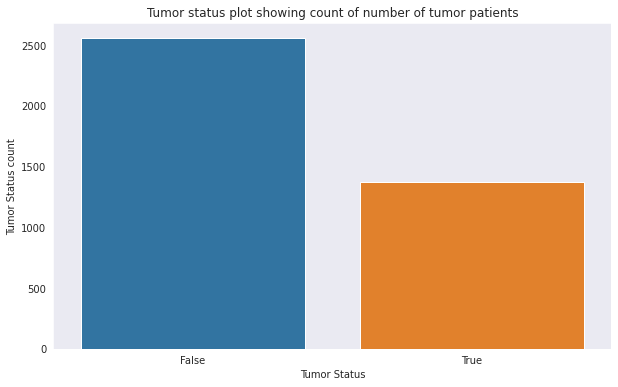

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(x=train_df.tumor_status)
plt.xlabel('Tumor Status')
plt.ylabel('Tumor Status count')
plt.title('Tumor status plot showing count of number of tumor patients')

In [10]:
train_df.describe()

,image,mask,tumor_status
count,3929,3929,3929
unique,3929,3929,2
top,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,False
freq,1,1,2556


In [11]:
display(train_df.count())
display(train_df.tumor_status.value_counts())

image           3929
mask            3929
tumor_status    3929
dtype: int64

False    2556
True     1373
Name: tumor_status, dtype: int64

## **Binary classfication of tumor detection**

> Now, we are first observing accuracies on a binary classfication model to observe model and training data behaviour. So, lets use a pre-trained model to do it. But, first lets make training and validation generator for it.

In [ ]:
train_df, val_df = train_test_split(train_df, test_size = 0.1)
train_df.reset_index(drop = True, inplace = True)
val_df.reset_index(drop = True, inplace = True)

In [ ]:
train_df.tumor_status = train_df.tumor_status.apply(lambda x : str(int(x)))
val_df.tumor_status = val_df.tumor_status.apply(lambda x : str(int(x)))

> Making Train Data

In [ ]:
IMAGE_SIZE = (256, 256, 3)
train_gen = ImageDataGenerator(rotation_range = 20,
                              zoom_range = 0.05,
                              width_shift_range = 0.05,
                              height_shift_range = 0.05,
                              shear_range = 0.05,
                              horizontal_flip = True,
                              vertical_flip = True,
                              fill_mode='nearest',
                              brightness_range = (0.5, 1.5)
                              )
val_gen = ImageDataGenerator()

train_data = train_gen.flow_from_dataframe(
                                           dataframe = train_df,
                                           directory = './',
                                           x_col = 'image',
                                           y_col = 'tumor_status',
                                           class_mode = 'binary',
                                           shuffle = True,
                                           target_size=(IMAGE_SIZE[0], IMAGE_SIZE[0]) 
                                          )
val_data = val_gen.flow_from_dataframe(
                                       dataframe = val_df,
                                       directory = './',
                                       x_col = 'image', 
                                       y_col = 'tumor_status',
                                       class_mode = 'binary',
                                       shuffle = True,
                                       target_size=(IMAGE_SIZE[0], IMAGE_SIZE[0]) 
                                      )

> Observing our augmented data and adjusting augmentation

In [ ]:
idx = np.random.randint(0,train_df.shape[0])
img_tumor = load_img(train_df.loc[idx].at['image'])
img_mask = load_img(train_df.loc[idx].at['mask'])
arr_tumor = img_to_array(img_tumor)
arr_mask = img_to_array(img_mask)
aug_tumor_gen = train_gen.flow(arr_tumor.reshape((1, ) + IMAGE_SIZE))

plt.imshow(img_tumor)
plt.title('original image')
plt.show()
plt.figure(figsize = (25, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.title('augmented image')
    plt.imshow(array_to_img(next(aug_tumor_gen)[0]))

In [ ]:
!pip install tensorflow --upgrade

> Now, we are making our binary classifier model

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2L

def binary_class_model():
    base_model = EfficientNetV2L(include_top = False, weights = 'imagenet', input_shape = IMAGE_SIZE)
    base_model.trainable = False
    
    inputs = tfl.Input(shape = IMAGE_SIZE)
    x = tf.keras.applications.efficientnet_v2.preprocess_input(inputs)
    x = base_model(x)
    x = tfl.GlobalAveragePooling2D()(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Flatten()(x)
    x = tfl.Dense(1024, activation='relu')(x)
    x = tfl.Dropout(0.4)(x)
    x = tfl.Dense(1, activation = 'sigmoid')(x)
    model = tf.keras.Model(inputs = inputs, outputs = x)
    
    return model

binary_model = binary_class_model()
binary_model.summary()

In [ ]:
tf.keras.utils.plot_model(
    binary_model, to_file='binary_model.png', show_shapes=True,
    show_dtype=True, show_layer_names=True)

In [ ]:
binary_model.compile(
                     optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4), 
                     loss = tf.keras.losses.BinaryCrossentropy(from_logits=False), 
                     metrics = ["accuracy"]
                    )
history_binary = binary_model.fit(
                                    train_data,
                                    validation_data = val_data,
                                    epochs=15
                                 )

In [ ]:
acc = history_binary.history['accuracy'] 
val_acc = history_binary.history['val_accuracy']
loss = history_binary.history['loss']  
val_loss = history_binary.history['val_loss'] 
epochs = range(1, len(acc) + 1)

# Accuracy 
plt.plot(epochs, acc, label='Train accuracy')
plt.plot(epochs, val_acc, label='Val accuracy')
plt.title('Training & validation accuracy')
plt.legend()
plt.grid('on')

# Loss
plt.figure()
plt.plot(epochs, loss, label='Train loss')
plt.plot(epochs, val_loss, label='Val loss')
plt.title('Training & validation loss')
plt.legend()
plt.grid('on')


In [ ]:
binary_model.save('binary_model_tumor.h5')
binary_model.save_weights('binary_model_weights_tumor.h5')

In [ ]:
binary_hist_df = pd.DataFrame(history_binary.history) 

# save to json:  
binary_hist_json_file = 'binary_history.json' 
with open(binary_hist_json_file, mode='w') as f:
    binary_hist_df.to_json(f)

# or save to csv: 
binary_hist_csv_file = 'binary_history.csv'
with open(binary_hist_csv_file, mode='w') as f:
    binary_hist_df.to_csv(f)

In [ ]:
binary_model = tf.keras.models.load_model('../input/brain-tumor-binary-model/binary_model_tumor.h5')

def show_n_images_from_prediction(n = 10):
    start = np.random.randint(0, len(mask_data_paths) - n + 1)
    
    for i in range(start, start + n):
        img_path = train_data_paths[i]
        msk_path = mask_data_paths[i]
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        msk = cv2.imread(msk_path)
        msk = cv2.cvtColor(msk,cv2.COLOR_BGR2GRAY)
        
        pred = binary_model.predict(np.expand_dims(img, axis=0))
        print('prediction : ', 'tumor' if pred[0]>0.5 else 'No tumor')

        plt.figure(figsize=(16,16))
        plt.subplot(1,3,1)
        plt.title('original', color='w')
        plt.imshow(img)

        plt.subplot(1,3,2)
        plt.title('mask', color='w')
        plt.imshow(msk)

        img[msk==255]=(0,255,255)
        plt.subplot(1,3,3)
        plt.title('original with mask', color='w')
        plt.imshow(img)
        plt.show()
        
show_n_images_from_prediction(10)

In [ ]:
binary_hist_df = pd.read_csv('../input/brain-tumor-binary-model/binary_history.csv')
binary_hist_df

## **Segmentation model for Tumour detection**

> Now, since we have achieved a decent amount of accuracy over binary classifcation problem, we are now moving on towards making our segmentation model. Here ,we are using a segmentation model library.

>[Link to official documentation of library](https://segmentation-models.readthedocs.io/en/latest/)

In [42]:
train_df = pd.DataFrame(data = {'image' : train_data_paths,
                                'mask' : mask_data_paths,
                                'tumor_status' : tumor_status})

train_df, val_df = train_test_split(train_df, test_size = 0.1)
train_df.reset_index(drop = True, inplace = True)
val_df.reset_index(drop = True, inplace = True)

train_df.tumor_status = train_df.tumor_status.apply(lambda x : str(int(x)))
val_df.tumor_status = val_df.tumor_status.apply(lambda x : str(int(x)))

In [43]:
def train_generator(data_frame, batch_size, aug_dict,
        image_color_mode="rgb",
        mask_color_mode="grayscale",
        image_save_prefix="image",
        mask_save_prefix="mask",
        save_to_dir=None,
        target_size=(256,256),
        seed=1, preprocessing_function = None):
    '''
    can generate image and mask at the same time use the same seed for
    image_datagen and mask_datagen to ensure the transformation for image
    and mask is the same if you want to visualize the results of generator,
    set save_to_dir = "your path"
    '''
    image_datagen = ImageDataGenerator(**aug_dict, preprocessing_function = preprocessing_function)
    mask_datagen = ImageDataGenerator(**aug_dict)
    image_generator = image_datagen.flow_from_dataframe(
        data_frame,
        x_col = "image",
        class_mode = None,
        color_mode = image_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = image_save_prefix,
        seed = seed)

    mask_generator = mask_datagen.flow_from_dataframe(
        data_frame,
        x_col = "mask",
        class_mode = None,
        color_mode = mask_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = mask_save_prefix,
        seed = seed)

    train_gen = zip(image_generator, mask_generator)
    
    for (img, mask) in train_gen:
        img, mask = adjust_data(img, mask)
        yield (img,mask)

def adjust_data(img,mask):
    img = img / 255
    mask = mask / 255
    mask[mask > 0.5] = 1
    mask[mask <= 0.5] = 0
    
    return (img, mask)

In [44]:
from tensorflow.keras.losses import binary_crossentropy

smooth = 100
epsilon = 1e-5
smooth = 1

def dice_coef(y_true, y_pred):
    y_truef=K.flatten(y_true)
    y_predf=K.flatten(y_pred)
    And=K.sum(y_truef* y_predf)
    return((2* And + smooth) / (K.sum(y_truef) + K.sum(y_predf) + smooth))

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

def iou(y_true, y_pred):
    intersection = K.sum(y_true * y_pred)
    sum_ = K.sum(y_true + y_pred)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return jac

def jac_distance(y_true, y_pred):
    y_truef=K.flatten(y_true)
    y_predf=K.flatten(y_pred)

    return - iou(y_true, y_pred)

def tversky(y_true, y_pred):
    y_true_pos = K.flatten(y_true)
    y_pred_pos = K.flatten(y_pred)
    true_pos = K.sum(y_true_pos * y_pred_pos)
    false_neg = K.sum(y_true_pos * (1-y_pred_pos))
    false_pos = K.sum((1-y_true_pos)*y_pred_pos)
    alpha = 0.7
    return (true_pos + smooth)/(true_pos + alpha*false_neg + (1-alpha)*false_pos + smooth)

def focal_tversky(y_true,y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    
    pt_1 = tversky(y_true, y_pred)
    gamma = 0.75
    return K.pow((1-pt_1), gamma)

def tversky_loss(y_true, y_pred):
    return 1 - tversky(y_true,y_pred)

In [45]:
!pip install git+https://github.com/qubvel/segmentation_models

  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-83d3uvfc
  Running command git clone --filter=blob:none -q https://github.com/qubvel/segmentation_models /tmp/pip-req-build-83d3uvfc
  Resolved https://github.com/qubvel/segmentation_models to commit 94f624b7029deb463c859efbd92fa26f512b52b8
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done


In [46]:
import segmentation_models as sm

sm.set_framework('tf.keras')
print(sm.framework())

tf.keras.backend.set_image_data_format('channels_last')

BACKBONE = 'resnet101'
preprocessing_function = sm.get_preprocessing(BACKBONE)

model = sm.Unet(backbone_name=BACKBONE, input_shape = (256,256, 3), classes=1, activation='sigmoid',
           encoder_weights = 'imagenet', encoder_freeze = True,
           decoder_block_type='transpose', decoder_filters=(256, 128, 64, 32, 16), 
           decoder_use_batchnorm = True)
seg_model.summary()

tf.keras
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 256, 256, 3)  9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_18 (ZeroPadding2 (None, 262, 262, 3)  0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 128, 128, 64) 9408        zero_padding2d_18[0][0]          
___________________________________________________________________________________

In [47]:
# m = sm.FPN(backbone_name='resnet101', input_shape=(256,256, 3), classes=3, 
#             activation='sigmoid', 
#            encoder_weights='imagenet', encoder_freeze=True)
# m.summary()

In [48]:
EPOCHS = 40
BATCH_SIZE = 32
learning_rate = 1e-4

from tensorflow.keras import backend as K

train_generator_args = dict(rotation_range=0.2,
                            width_shift_range=0.05,
                            height_shift_range=0.05,
                            shear_range=0.05,
                            zoom_range=0.05,
                            horizontal_flip=True,
                            vertical_flip = True,
                            fill_mode='nearest')

im_height, im_width = 256,256

train_gen = train_generator(train_df, BATCH_SIZE,
                                train_generator_args,
                                target_size=(im_height, im_width), preprocessing_function = preprocessing_function)
    
test_gener = train_generator(val_df, BATCH_SIZE,
                                dict(),
                                target_size=(im_height, im_width), preprocessing_function = preprocessing_function)
    
# model = unet(input_size=(im_height, im_width, 3))

decay_rate = learning_rate / EPOCHS
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate, decay=decay_rate)
seg_model.compile(optimizer=opt, loss=focal_tversky, metrics=["binary_accuracy", iou, dice_coef,tversky])

callbacks = [tf.keras.callbacks.ModelCheckpoint('unet_brain_mri_seg.h5', verbose=1, save_best_only=True),
            tf.keras.callbacks.CSVLogger('model_history.csv', append=False),
            tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0.0001,
                              mode='min', 
                              verbose=1, 
                              patience=20,
                              restore_best_weights = True
                             ),
            tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                              mode='min',
                              verbose=1,
                              patience=10,
                              min_delta=0.0001,
                              factor=0.2
                             )]

history = seg_model.fit(train_gen,
                    steps_per_epoch=len(train_df) / BATCH_SIZE, 
                    epochs=EPOCHS, 
                    callbacks=callbacks,
                    validation_data = test_gener,
                    validation_steps=len(val_df) / BATCH_SIZE)

Found 3536 validated image filenames.
Found 3536 validated image filenames.
Epoch 1/40
110/110 [==============================] - 99s 836ms/step - loss: 0.2115 - binary_accuracy: 0.9969 - iou: 0.7381 - dice_coef: 0.8470 - tversky: 0.8727 - val_loss: 0.2011 - val_binary_accuracy: 0.9974 - val_iou: 0.7781 - val_dice_coef: 0.8745 - val_tversky: 0.8827

Epoch 00001: val_loss improved from inf to 0.20112, saving model to unet_brain_mri_seg.h5


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/40
110/110 [==============================] - 91s 828ms/step - loss: 0.2011 - binary_accuracy: 0.9972 - iou: 0.7533 - dice_coef: 0.8573 - tversky: 0.8811 - val_loss: 0.1999 - val_binary_accuracy: 0.9975 - val_iou: 0.7709 - val_dice_coef: 0.8699 - val_tversky: 0.8809

Epoch 00002: val_loss improved from 0.20112 to 0.19993, saving model to unet_brain_mri_seg.h5
Epoch 3/40
110/110 [==============================] - 90s 818ms/step - loss: 0.2036 - binary_accuracy: 0.9971 - iou: 0.7536 - dice_coef: 0.8564 - tversky: 0.8781 - val_loss: 0.2001 - val_binary_accuracy: 0.9975 - val_iou: 0.7669 - val_dice_coef: 0.8646 - val_tversky: 0.8669

Epoch 00003: val_loss did not improve from 0.19993
Epoch 4/40
110/110 [==============================] - 90s 815ms/step - loss: 0.1955 - binary_accuracy: 0.9972 - iou: 0.7625 - dice_coef: 0.8627 - tversky: 0.8845 - val_loss: 0.1833 - val_binary_accuracy: 0.9971 - val_iou: 0.7515 - val_dice_coef: 0.8556 - val_tversky: 0.8875

Epoch 00004: val_loss impro

In [49]:
xx = pd.read_csv('./model_history.csv')
xx

,epoch,binary_accuracy,dice_coef,iou,loss,tversky,val_binary_accuracy,val_dice_coef,val_iou,val_loss,val_tversky
0,0,0.996890,0.847027,0.738116,0.211519,0.872655,0.997428,0.874494,0.778060,0.201115,0.882704
1,1,0.997151,0.857279,0.753290,0.201143,0.881117,0.997531,0.869932,0.770895,0.199934,0.880911
2,2,0.997066,0.856426,0.753632,0.203630,0.878123,0.997528,0.864615,0.766945,0.200111,0.866868
3,3,0.997217,0.862690,0.762514,0.195535,0.884524,0.997070,0.855625,0.751469,0.183290,0.887546
4,4,0.997143,0.859137,0.758252,0.197782,0.882303,0.997653,0.889988,0.803169,0.183052,0.898413
5,5,0.996954,0.857362,0.756736,0.199902,0.880244,0.997543,0.874637,0.778031,0.209910,0.873572
6,6,0.997250,0.863620,0.765051,0.191610,0.887213,0.997578,0.881177,0.789327,0.171789,0.902287
7,7,0.997242,0.864531,0.766601,0.192687,0.886096,0.997798,0.876289,0.781026,0.216281,0.871359
8,8,0.997330,0.870880,0.774786,0.185714,0.891901,0.994878,0.785128,0.648080,0.242301,0.846809
9,9,0.997269,0.868331,0.773136,0.187892,0.889789,0.997347,0.849253,0.743316,0.187106,0.882994


In [50]:
seg_model.save('seg_model_brain.h5')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
